In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
folder = '/content/drive/My Drive/Chess_Project/Data'
image_size = (224, 224)
batch_size = 32

In [10]:
import os
import glob
import shutil
import random

# --- 1. 定义路径和参数 ---
# Google Drive中的项目主目录
project_path = '/content/drive/My Drive/Chess_Project/'
# 存放最终训练/测试数据的地方
data_path = os.path.join(project_path, 'Data')

# !!!重要!!! 请将这里的路径修改为您解压后，包含 bb, bk, bn... 这些文件夹的实际路径
# 例如，如果解压后是 /content/drive/My Drive/Chess_Project/Data/Chess-Dataset/，则填写该路径
original_data_path = os.path.join(data_path, 'Chess-Dataset') # 假设解压后的主文件夹叫 Chess-Dataset

# 训练集和测试集的目标路径
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

# 根据您的截图更新的文件夹名映射
# key是原始文件夹名(小写)，value是模型需要的文件夹名(大写/首字母大写)
class_mapping = {
    'bb': 'BB',
    'bk': 'BK',
    'bn': 'BN',
    'bp': 'BP',
    'bq': 'BQ',
    'br': 'BR',
    'empty': 'Empty',
    'wb': 'WB',
    'wk': 'WK',
    'wn': 'WN',
    'wp': 'WP',
    'wq': 'WQ',
    'wr': 'WR'
}

# 训练集划分比例
split_ratio = 0.8

# --- 2. 检查路径并执行划分 ---
if not os.path.exists(original_data_path):
    print(f"错误：请确保原始数据路径 '{original_data_path}' 正确无误。")
else:
    print(f"成功找到原始数据路径: {original_data_path}")
    # 创建 train 和 test 目录
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    for original_name, target_name in class_mapping.items():
        print(f"\n正在处理类别: {original_name} -> {target_name}")

        # 创建 train 和 test 下的子目录
        os.makedirs(os.path.join(train_path, target_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, target_name), exist_ok=True)

        # 获取源文件夹中所有的图片文件
        source_dir = os.path.join(original_data_path, original_name)
        if not os.path.exists(source_dir):
            print(f"  - 警告: 源文件夹 {source_dir} 不存在，跳过。")
            continue

        files = glob.glob(os.path.join(source_dir, '*.jpeg'))
        if not files:
            files = glob.glob(os.path.join(source_dir, '*.png'))

        if not files:
            print(f"  - 警告: 在 {source_dir} 中未找到图片文件，跳过。")
            continue

        # 打乱文件列表以确保随机划分
        random.shuffle(files)

        # 计算划分点
        split_point = int(len(files) * split_ratio)

        # 分配文件
        train_files = files[:split_point]
        test_files = files[split_point:]

        # 移动文件到 train 目录
        for f in train_files:
            # 使用 shutil.copy 替代 shutil.move，保留原始数据
            shutil.copy(f, os.path.join(train_path, target_name))

        # 移动文件到 test 目录
        for f in test_files:
            shutil.copy(f, os.path.join(test_path, target_name))

        print(f"  - {len(train_files)} 张图片复制到 train/{target_name}")
        print(f"  - {len(test_files)} 张图片复制到 test/{target_name}")

    print("\n所有文件已成功划分为训练集和测试集！")
    print(f"数据已准备就绪，位于: {data_path}")

成功找到原始数据路径: /content/drive/My Drive/Chess_Project/Data/Chess-Dataset

正在处理类别: bb -> BB
  - 160 张图片复制到 train/BB
  - 40 张图片复制到 test/BB

正在处理类别: bk -> BK
  - 82 张图片复制到 train/BK
  - 21 张图片复制到 test/BK

正在处理类别: bn -> BN
  - 136 张图片复制到 train/BN
  - 35 张图片复制到 test/BN

正在处理类别: bp -> BP
  - 154 张图片复制到 train/BP
  - 39 张图片复制到 test/BP

正在处理类别: bq -> BQ
  - 148 张图片复制到 train/BQ
  - 37 张图片复制到 test/BQ

正在处理类别: br -> BR
  - 158 张图片复制到 train/BR
  - 40 张图片复制到 test/BR

正在处理类别: empty -> Empty
  - 169 张图片复制到 train/Empty
  - 43 张图片复制到 test/Empty

正在处理类别: wb -> WB
  - 172 张图片复制到 train/WB
  - 43 张图片复制到 test/WB

正在处理类别: wk -> WK
  - 88 张图片复制到 train/WK
  - 22 张图片复制到 test/WK

正在处理类别: wn -> WN
  - 164 张图片复制到 train/WN
  - 41 张图片复制到 test/WN

正在处理类别: wp -> WP
  - 159 张图片复制到 train/WP
  - 40 张图片复制到 test/WP

正在处理类别: wq -> WQ
  - 158 张图片复制到 train/WQ
  - 40 张图片复制到 test/WQ

正在处理类别: wr -> WR
  - 172 张图片复制到 train/WR
  - 44 张图片复制到 test/WR

所有文件已成功划分为训练集和测试集！
数据已准备就绪，位于: /content/drive/My Drive/Chess_Project/Data


In [13]:
!pip install keras

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=5,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        rescale=1./255,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_gen = datagen.flow_from_directory(
    folder + '/train',
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    folder + '/test',
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle=False
)

Found 1920 images belonging to 13 classes.
Found 485 images belonging to 13 classes.


In [17]:
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import decode_predictions

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Establish new fully connected block
x = base_model.output
x = Flatten()(x)  # flatten from convolution tensor output
x = Dense(500, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dense(500, activation='relu')(x)
predictions = Dense(13, activation='softmax')(x) # should match # of classes predicted

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
epochs = 10

history = model.fit(
    train_gen,
    epochs=epochs,
    verbose = 1,
    validation_data=test_gen
    )

# 使用 model.save() 保存完整的模型（结构+权重）
save_path = '/content/drive/My Drive/Chess_Project/model_VGG16.h5'
model.save(save_path)
print(f"完整的模型已成功保存至: {save_path}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 481ms/step - categorical_accuracy: 0.1992 - loss: 3.3934 - val_categorical_accuracy: 0.5505 - val_loss: 1.2500
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - categorical_accuracy: 0.6721 - loss: 0.9740 - val_categorical_accuracy: 0.6907 - val_loss: 0.8286
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - categorical_accuracy: 0.7925 - loss: 0.5870 - val_categorical_accuracy: 0.8041 - val_loss: 0.5646
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 399ms/step - categorical_accuracy: 0.8633 - loss: 0.4215 - val_categorical_accuracy: 0.8412 - val_loss: 0.4716
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 399ms/step - categorical_accuracy: 0.9044 - loss: 0.2771 - val_categorical_accuracy: 0.8598 - val_loss: 0.4441
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 397ms/step - categorical_accuracy: 0.8953 - loss: 0.2926 - val_categorical_accuracy: 0.8309 - val_loss: 0.4836
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - categorical_accuracy: 0.931

完整的模型已成功保存至: /content/drive/My Drive/Chess_Project/model_VGG16.h5


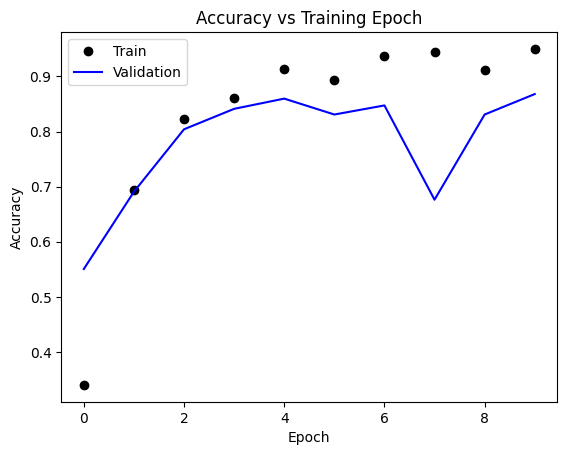

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(history.history['categorical_accuracy'], 'ko')
plt.plot(history.history['val_categorical_accuracy'], 'b')

plt.title('Accuracy vs Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation']);

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step
0.52625


<Axes: xlabel='Predicted', ylabel='Actual'>

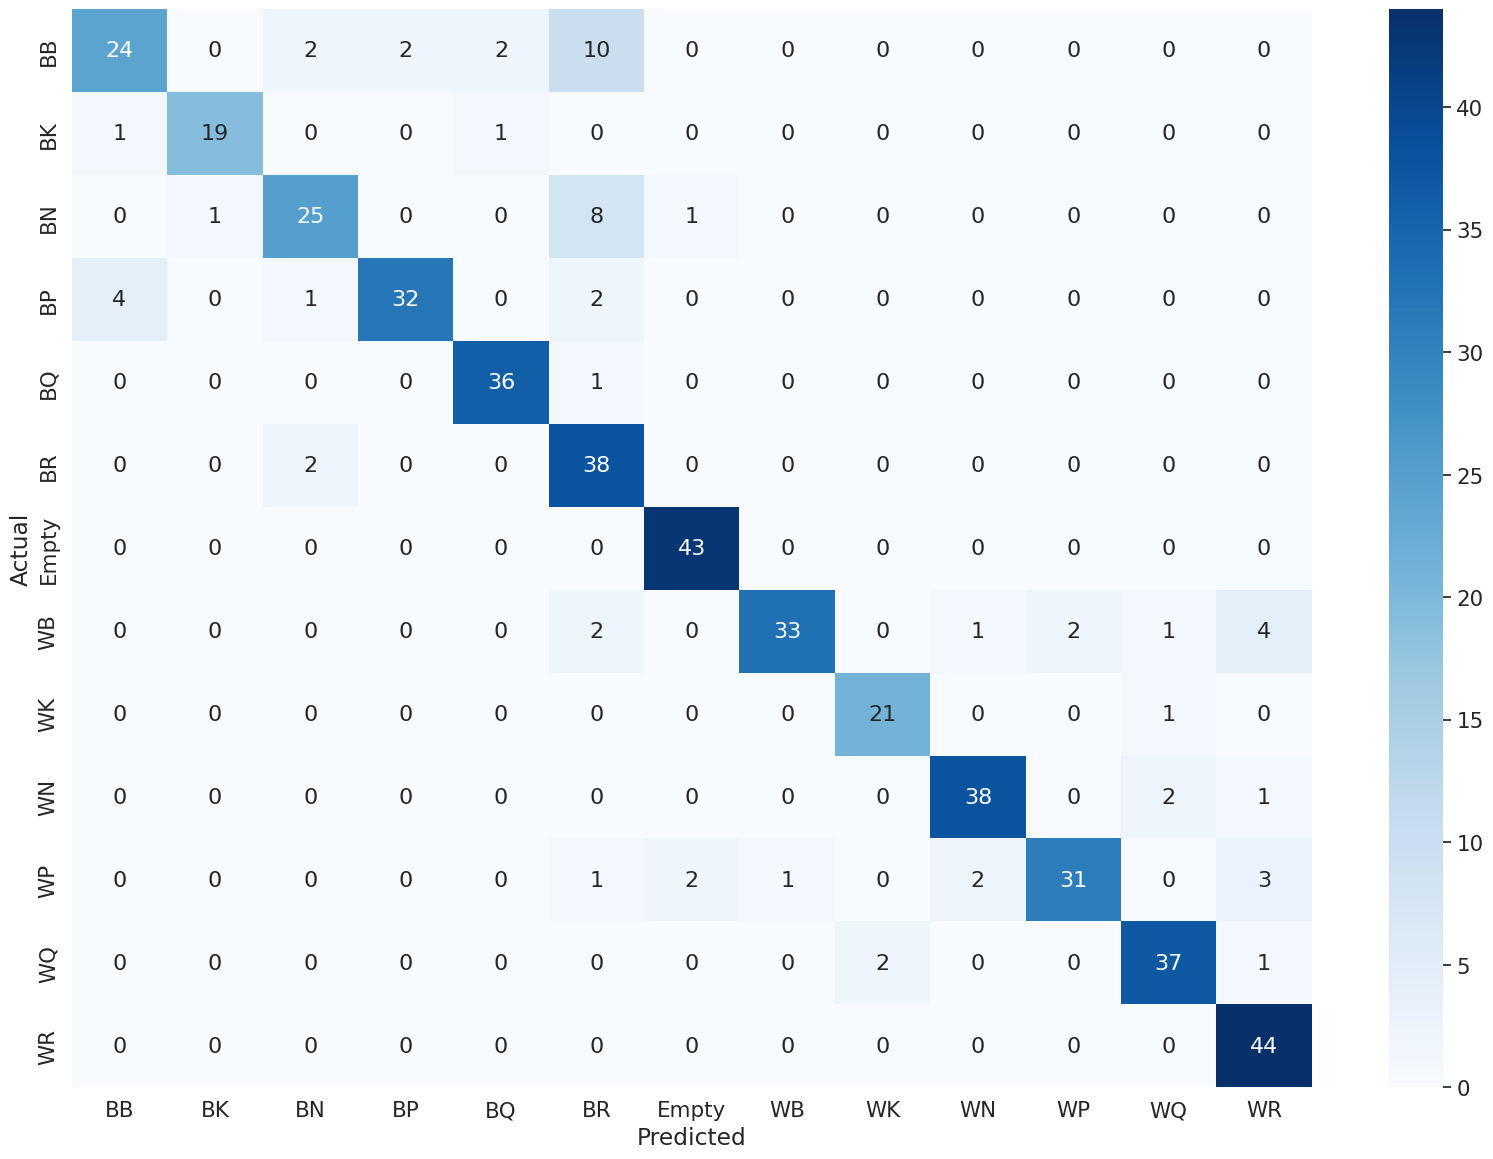

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['BB', 'BK', 'BN', 'BP', 'BQ', 'BR', 'Empty', 'WB', 'WK', 'WN', 'WP', 'WQ', 'WR']

test_gen.reset()
Y_pred = model.predict(test_gen) # Use the standard predict method
classes = test_gen.classes[test_gen.index_array]
y_pred = np.argmax(Y_pred, axis= -1)
print(sum(y_pred==classes)/800)


data = confusion_matrix(classes, y_pred)
df_cm = pd.DataFrame(data, columns=target_names, index = target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,14))
sn.set(font_scale=1.4)  #for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [23]:
print('Confusion Matrix')
print(data)
print('Classification Report')
print(classification_report(test_gen.classes[test_gen.index_array], y_pred, target_names=target_names))

Confusion Matrix
[[24  0  2  2  2 10  0  0  0  0  0  0  0]
 [ 1 19  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1 25  0  0  8  1  0  0  0  0  0  0]
 [ 4  0  1 32  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0 36  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0 33  0  1  2  1  4]
 [ 0  0  0  0  0  0  0  0 21  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  2  1]
 [ 0  0  0  0  0  1  2  1  0  2 31  0  3]
 [ 0  0  0  0  0  0  0  0  2  0  0 37  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44]]
Classification Report
              precision    recall  f1-score   support

          BB       0.83      0.60      0.70        40
          BK       0.95      0.90      0.93        21
          BN       0.83      0.71      0.77        35
          BP       0.94      0.82      0.88        39
          BQ       0.92      0.97      0.95        37
          BR       0.61      0.95      0.75        40
       Empty       0.93      1.00  

In [24]:
from keras.applications.vgg19 import VGG19
from keras.applications.imagenet_utils import decode_predictions

model_two = VGG19(weights='imagenet')
model_two.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

base_model_two = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze convolutional layers
for layer in base_model_two.layers:
    layer.trainable = False

# Establish new fully connected block
x = base_model_two.output
x = Flatten()(x)  # flatten from convolution tensor output
x = Dense(500, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dense(500, activation='relu')(x)
predictions = Dense(13, activation='softmax')(x) # should match # of classes predicted

# this is the model we will train
model_two = Model(inputs=base_model_two.input, outputs=predictions)
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
epochs = 10

history = model_two.fit(
    train_gen,
    epochs=epochs,
    verbose = 1,
    validation_data=test_gen
    )
# 使用 model.save() 保存完整的模型（结构+权重）
save_path = '/content/drive/My Drive/Chess_Project/model_VGG19.h5'
model.save(save_path)
print(f"完整的模型已成功保存至: {save_path}")

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 448ms/step - accuracy: 0.1829 - loss: 3.3625 - val_accuracy: 0.3918 - val_loss: 1.6484
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 401ms/step - accuracy: 0.5292 - loss: 1.3268 - val_accuracy: 0.6845 - val_loss: 0.8954
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 401ms/step - accuracy: 0.7133 - loss: 0.7920 - val_accuracy: 0.6763 - val_loss: 0.9263
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - accuracy: 0.7988 - loss: 0.5841 - val_accuracy: 0.7588 - val_loss: 0.6524
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 394ms/step - accuracy: 0.8391 - loss: 0.4731 - val_accuracy: 0.8021 - val_loss: 0.5757
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.8804 - loss: 0.3509 - val_accuracy: 0.7629 - val_loss: 0.7046
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - accuracy: 0.8706 - loss: 0.3755 - val_accuracy: 0.8742 - val_loss: 0.4711
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 403ms/step - accuracy: 0.9165 - loss: 0.2477 - val_accu

完整的模型已成功保存至: /content/drive/My Drive/Chess_Project/model_VGG19.h5


In [28]:
test_gen.reset()
Y_pred = model_two.predict(test_gen)
classes = test_gen.classes[test_gen.index_array]
y_pred = np.argmax(Y_pred, axis= -1)
print(sum(y_pred==classes)/800)


print('Confusion Matrix')
print(confusion_matrix(classes, y_pred))
print('Classification Report')
print(classification_report(test_gen.classes[test_gen.index_array], y_pred, target_names=target_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step
0.5025
Confusion Matrix
[[20  0  6  7  1  5  0  0  0  0  1  0  0]
 [ 0 19  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  0 29  2  0  0  0  0  0  0  0]
 [ 0  0  7  3  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  2 10  1  1]
 [ 0  0  0  0  0  0  0  4 13  0  1  4  0]
 [ 0  0  0  0  0  0  0  0  0 35  3  0  3]
 [ 0  0  0  0  0  0  0  1  0  1 36  0  2]
 [ 0  1  0  0  0  0  0  0  0  1  0 38  0]
 [ 0  0  1  0  0  1  0  0  0  2  1  0 39]]
Classification Report
              precision    recall  f1-score   support

          BB       1.00      0.50      0.67        40
          BK       0.86      0.90      0.88        21
          BN       0.61      0.94      0.74        35
          BP       0.79      0.97      0.87        39
          BQ       0.97      0.78      0.87        37
          BR       0.75      0.75      0.